In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

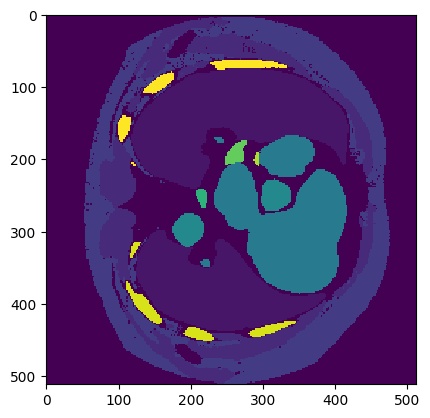

In [17]:
#Available masks: muslce, fat, all lung lobes, liver, heart, aorta, kidneys
llll = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_lower_lobe_left.nii.gz")
lllr = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_lower_lobe_right.nii.gz")
lull = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_upper_lobe_left.nii.gz")
lulr = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_upper_lobe_right.nii.gz")
lulm = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/lung_middle_lobe_right.nii.gz")
skeletal_muscle = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/skeletal_muscle.nii.gz")
fat = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/subcutaneous_fat.nii.gz")
trachea = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/trachea.nii.gz")
liver = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/liver.nii.gz")
heart = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/heart.nii.gz")
aorta = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/aorta.nii.gz")
kidney_left = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/kidney_left.nii.gz")
kidney_right = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/kidney_right.nii.gz")
pancreas = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/pancreas.nii.gz")
carotid_left = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/common_carotid_artery_left.nii.gz")
carotid_right = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/common_carotid_artery_right.nii.gz")
inf_vena_cava = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/inferior_vena_cava.nii.gz")
pulmonary_vein = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/pulmonary_vein.nii.gz")
subclav_left = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/subclavian_artery_left.nii.gz")
subclav_right = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/subclavian_artery_right.nii.gz")
superior_vena_cava = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/superior_vena_cava.nii.gz")
rib_left_1 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_1.nii.gz")
rib_left_2 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_2.nii.gz")
rib_left_3 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_3.nii.gz")
rib_left_4 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_4.nii.gz")
rib_left_5 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_5.nii.gz")
rib_left_6 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_6.nii.gz")
rib_left_7 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_7.nii.gz")
rib_left_8 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_8.nii.gz")
rib_left_9 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_9.nii.gz")
rib_left_10 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_10.nii.gz")
rib_left_11 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_11.nii.gz")
rib_left_12 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_left_12.nii.gz")
rib_right_1 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_1.nii.gz")
rib_right_2 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_2.nii.gz")
rib_right_3 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_3.nii.gz")
rib_right_4 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_4.nii.gz")
rib_right_5 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_5.nii.gz")
rib_right_6 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_6.nii.gz")
rib_right_7 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_7.nii.gz")
rib_right_8 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_8.nii.gz")
rib_right_9 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_9.nii.gz")
rib_right_10 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_10.nii.gz")
rib_right_11 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_11.nii.gz")
rib_right_12 = nib.load("/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/122924/segmentations/rib_right_12.nii.gz")


llll_data = llll.get_fdata()
lllr_data = lllr.get_fdata()
lull_data = lull.get_fdata()
lulr_data = lulr.get_fdata()
lulm_data = lulm.get_fdata()
skeletal_muscle_data = skeletal_muscle.get_fdata()
fat_data = fat.get_fdata()
trachea_data = trachea.get_fdata()
liver_data = liver.get_fdata()
heart_data = heart.get_fdata()
aorta_data = aorta.get_fdata()
kidney_left_data = kidney_left.get_fdata()
kidney_right_data = kidney_right.get_fdata()
pancreas_data = pancreas.get_fdata()
carotid_left_data = carotid_left.get_fdata()
carotid_right_data = carotid_right.get_fdata()
inf_vena_cava_data = inf_vena_cava.get_fdata()
pulmonary_vein_data = pulmonary_vein.get_fdata()
subclav_left_data = subclav_left.get_fdata()
subclav_right_data = subclav_right.get_fdata()
superior_vena_cava_data = superior_vena_cava.get_fdata()
rib_left_1_data = rib_left_1.get_fdata()
rib_left_2_data = rib_left_2.get_fdata()
rib_left_3_data = rib_left_3.get_fdata()
rib_left_4_data = rib_left_4.get_fdata()
rib_left_5_data = rib_left_5.get_fdata()
rib_left_6_data = rib_left_6.get_fdata()
rib_left_7_data = rib_left_7.get_fdata()
rib_left_8_data = rib_left_8.get_fdata()
rib_left_9_data = rib_left_9.get_fdata()
rib_left_10_data = rib_left_10.get_fdata()
rib_left_11_data = rib_left_11.get_fdata()
rib_left_12_data = rib_left_12.get_fdata()
rib_right_1_data = rib_right_1.get_fdata()
rib_right_2_data = rib_right_2.get_fdata()
rib_right_3_data = rib_right_3.get_fdata()
rib_right_4_data = rib_right_4.get_fdata()
rib_right_5_data = rib_right_5.get_fdata()
rib_right_6_data = rib_right_6.get_fdata()
rib_right_7_data = rib_right_7.get_fdata()
rib_right_8_data = rib_right_8.get_fdata()
rib_right_9_data = rib_right_9.get_fdata()
rib_right_10_data = rib_right_10.get_fdata()
rib_right_11_data = rib_right_11.get_fdata()
rib_right_12_data = rib_right_12.get_fdata()



#Combine all lung lobes to make a single mask
mask = np.zeros(shape = llll_data.shape, dtype = np.uint8)
mask[llll_data == 1] = 1
mask[lllr_data == 1] = 1
mask[lull_data == 1] = 1
mask[lulr_data == 1] = 1
mask[lulm_data == 1] = 1
mask[skeletal_muscle_data == 1] = 2
mask[fat_data == 1] = 3
mask[trachea_data == 1] = 4
mask[liver_data == 1] = 5
mask[kidney_left_data == 1] = 6
mask[kidney_right_data == 1] = 6
mask[heart_data == 1] = 7
mask[aorta_data == 1] = 8
mask[pancreas_data == 1] = 9
mask[carotid_left_data == 1] = 10
mask[carotid_right_data == 1] = 10
mask[inf_vena_cava_data == 1] = 11
mask[pulmonary_vein_data == 1] = 12
mask[subclav_left_data == 1] = 13
mask[subclav_right_data == 1] = 13
mask[superior_vena_cava_data == 1] = 14
mask[rib_left_1_data == 1] = 15
mask[rib_left_2_data == 1] = 15
mask[rib_left_3_data == 1] = 15
mask[rib_left_4_data == 1] = 15
mask[rib_left_5_data == 1] = 15
mask[rib_left_6_data == 1] = 15
mask[rib_left_7_data == 1] = 15
mask[rib_left_8_data == 1] = 15
mask[rib_left_9_data == 1] = 15
mask[rib_left_10_data == 1] = 15
mask[rib_left_11_data == 1] = 15
mask[rib_left_12_data == 1] = 15
mask[rib_right_1_data == 1] = 16
mask[rib_right_2_data == 1] = 16
mask[rib_right_3_data == 1] = 16
mask[rib_right_4_data == 1] = 16
mask[rib_right_5_data == 1] = 16
mask[rib_right_6_data == 1] = 16
mask[rib_right_7_data == 1] = 16
mask[rib_right_8_data == 1] = 16
mask[rib_right_9_data == 1] = 16
mask[rib_right_10_data == 1] = 16
mask[rib_right_11_data == 1] = 16
mask[rib_right_12_data == 1] = 16


#Plot the mask
plt.imshow(mask[:,:,74])
plt.show()

In [18]:
#find the unique values in the mask
unique_values = np.unique(mask)
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [19]:
nifti_mask = nib.Nifti1Image(mask, llll.affine, llll.header)
nib.save(nifti_mask, "mask.nii.gz")

In [20]:
#check data type 
print(llll_data.dtype)
print(mask.dtype)

float64
uint8
